Not merged.

In [2]:
from dSPEECH.config import *
import librosa
import matplotlib.pyplot as plt

pre_all: Running from CMD.
common_dl.py: Using CUDA.


In [3]:
folder=data_dir+'evaluation_matrix/dataset2/audio_samples/'
file_orignal='p3_all_sentences_original.wav'
file_recon1='p3_all_sentences_densenet.wav'
file_recon2='p3_all_sentences_rnn.wav'
target,sf=librosa.load(folder+file_orignal)
pred,sf=librosa.load(folder+file_recon2)

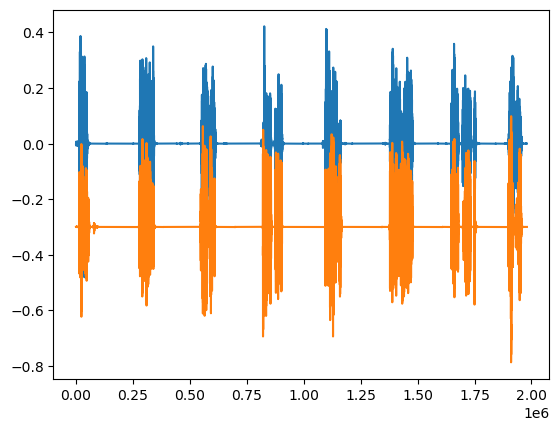

In [3]:
plt.plot(target)
plt.plot(pred-0.3) # shift down for better visualization

In [18]:
trial_num=8
trial_len=len(target)/trial_num
lines=[int(trial_len*i) for i in range(trial_num)]

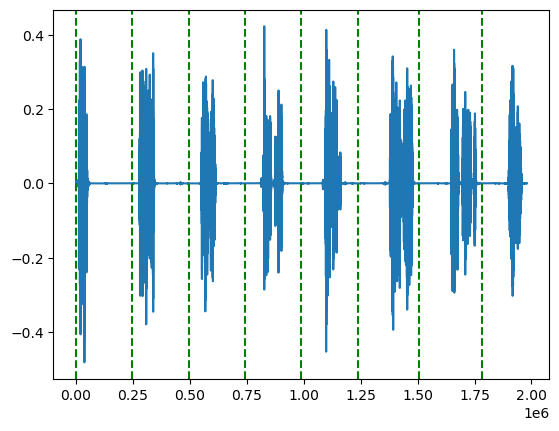

In [19]:
# adjust the last two trials boundary
lines[-1]=lines[-1]+52050
lines[-2]=lines[-2]+22050
fig,ax=plt.subplots()
ax.plot(target)
for line in lines:
    ax.axvline(x=line, color='green', linestyle='--')

In [27]:
import soundfile
trial_starts=lines
for trial in range(trial_num):
    if trial==trial_num-1:
        tmp1=target[trial_starts[trial]:]
        soundfile.write(folder+'target_trial_'+str(trial)+'.wav', tmp1, sf)
        
        tmp2=pred[trial_starts[trial]:]
        soundfile.write(folder+'pred_trial_'+str(trial)+'.wav', tmp2, sf)
        
    else:
        tmp1=target[trial_starts[trial]:trial_starts[trial+1]]
        soundfile.write(folder+'target_trial_'+str(trial)+'.wav', tmp1, sf)
        
        tmp2=pred[trial_starts[trial]:trial_starts[trial+1]]
        soundfile.write(folder+'pred_trial_'+str(trial)+'.wav', tmp2, sf)

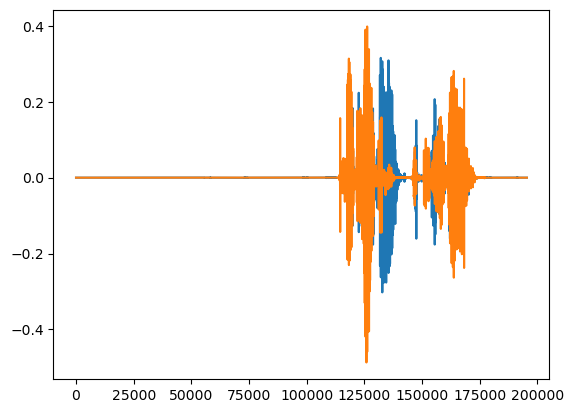

In [24]:
# second last trials
plt.plot(tmp1)
plt.plot(tmp2)

There is a problem with long-time silent period: the overall score will be overrated even if the reconstruction is bad.

Need to extract only the speaking part.

In [6]:
starts_target=[0.55,12.44,24.79,37.18,49.58,62.43,74.69,86.08]
ends_target=[3.0,16.05,28.17,41.40,53.2,67.51,80.06,89.17]

starts_pred=starts_target
ends_pred=ends_target

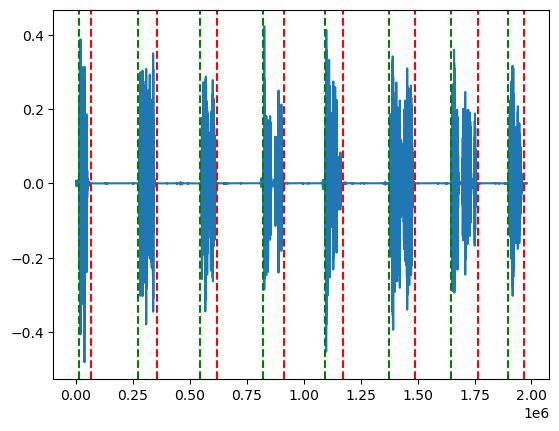

In [5]:
fig,ax=plt.subplots()
ax.plot(target)
for i in range(len(starts_target)):
    ax.axvline(x=int(starts_target[i]*sf), color='green', linestyle='--')
    ax.axvline(x=int(ends_target[i]*sf), color='red', linestyle='--')

In [8]:
import soundfile
for i in range(len(starts_pred)):
    tmp1=target[int(starts_target[i]*sf):int(ends_target[i]*sf)]
    soundfile.write(folder+'target_trial_'+str(i)+'.wav', tmp1, sf)
    
    tmp2=pred[int(starts_pred[i]*sf):int(ends_pred[i]*sf)]
    soundfile.write(folder+'pred_trial_'+str(i)+'.wav', tmp2, sf)